## Part 1 - 4.10 Coding Etiquette & Excel Reporting

### Table of Contents

#### 01. Import Libraries

#### 02. Create path & Import Dataframes

#### 03. Data security PII

#### 04. Create regional segmentation of data

#### 05. Create an exclusion flag for low-activity customers - exclude customers with less than 5 orders)

#### 06. Generate Customer profiling Variables (age, income, number of dependents)

#### 07. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

#### 08. Region and Department based comparison between customer profiles

#### 10. Determine whether there’s a difference in spending habits between the different U.S. regions

#### 11. Visualizations

#### 12. Export

#### 01. Import Libraries

In [7]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#### 02. Create path & Import Dataframes

In [9]:
# create a path
path = r'/Users/renatabatista/Other Docs/Germany/CareerFoundry/Data Imersion/4. Python/14-04-2025 Instacart Basket Analysis'

In [10]:
# Import the big merged df
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

In [11]:
# Verify the imported dataframe
ords_prods_merge.head(10)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,frequency_flag,First Name,Last Name,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,Regular customer,Christina,Wallace,Female,Hawaii,51,1/4/2019,2,married,57797
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,Regular customer,NaN,Parks,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171
7,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,12,3,10,...,Frequent customer,Sandra,Trejo,Female,Tennessee,65,7/25/2019,0,divorced/widowed,44856
8,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,10,1,20,...,Frequent customer,Ralph,Avalos,Male,Oregon,72,3/30/2018,1,married,153843
9,1,Chocolate Sandwich Cookies,61,19,5.8,589712,1052,15,1,12,...,Frequent customer,Ralph,Avalos,Male,Oregon,72,3/30/2018,1,married,153843


#### 03. Data security PII

#### Before continuing, PII (Personally Identifiable Information) in the dataset must be protected. Fields like First Name, Last Name, State, Date Joined, Income, and User ID should be anonymized or removed. Sensitive data can be aggregated (e.g., income ranges) and geographic details generalized. Ensuring secure storage and limiting access to authorized users will help maintain privacy and comply with data protection laws

#### To protect customer privacy and comply with data protection regulations (such as GDPR or CCPA), the following actions should be taken:

#### - Anonymize or remove PII fields like names, exact dates, and user IDs.

#### - Aggregate sensitive data (e.g., group income into ranges rather than showing exact amounts).

#### - Mask geographic information (e.g., use regions instead of specific states if necessary).

#### - Ensure secure storage of any datasets with PII and limit access to authorized personnel only.


###### The merged data includes first names and last names for all customers, making them identifiable. Customers have unique id numbers, so there is no need for personal names when analysing the data. Therefore, it is prudent to remove the names while working with the data, thus reducing security risks.

In [15]:
# Create a df that does not contain first and last name 
ords_prods_merge_PII = ords_prods_merge.drop(['First Name', 'Last Name'],  axis =1)

#### 04.Create regional segmentation of data

In [17]:
#Through the wikipedia article,  we will create 4 regions: Northeast, Midwest, South, and West.

# Step 1: regional mapping
# 'Northeast': ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'],
# 'Midwest': ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'],
# 'South': ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'],
# 'West': ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

#step 2: creating the if statements within the new empty list of region_map
region_map = []

for value in ords_prods_merge_PII['State']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        region_map.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        region_map.append('Midwest')
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        region_map.append('South')
    elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
        region_map.append('West')
    else:
        region_map.append('Not enough data')

region_map

['Midwest',
 'Midwest',
 'Northeast',
 'Midwest',
 'Midwest',
 'West',
 'South',
 'South',
 'West',
 'West',
 'West',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'South',
 'West',
 'South',
 'South',
 'Northeast',
 'Midwest',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'South',
 'South',
 'Midwest',
 'West',
 'West',
 'South',
 'South',
 'South',
 'South',
 'Northeast',
 'Northeast',
 'Northeast',
 'Northeast',
 'Northeast',
 'South',
 'West',
 'Midwest',
 'South',
 'South',
 'West',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'West',
 'Midwest',
 'West',
 'Northeast',
 'South',
 'South',
 'South',
 'South',

In [18]:
# setting region_map to new column region
ords_prods_merge_PII['Region']=region_map

In [19]:
# Value counts to make sure script was correctly performed 
ords_prods_merge_PII['Region'].value_counts(dropna = False)

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [20]:
#Comparing it to total counts of the dataset
ords_prods_merge_PII.shape

(32404859, 33)

#### Total of 32429085 rows are equal to the the total count when adding up the values of all 4 regions.

#### There are no NaN values - all correctly performed

In [22]:
# Spending habits/ patterns between the different U.S. regions. 
# Hint: You can do this by crossing the variable you just created with the spending flag

crosstab = pd.crosstab(ords_prods_merge_PII['Region'], ords_prods_merge_PII['spender_flag'], dropna = False)
crosstab.to_clipboard()

In [23]:
# Saving crosstab to clipboard
crosstab.to_clipboard()

In [24]:
crosstab

spender_flag,High_spender,Low_spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


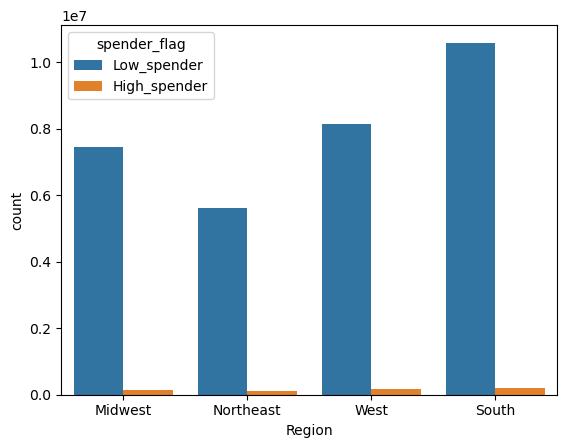

In [25]:
clusterbar = sns.countplot(data=ords_prods_merge_PII, x='Region', hue='spender_flag')

##### The majority of customers are categorized as low spenders.

##### South region we can see the Highest and the Lowest spender.

##### It does not appear that high spending customers are associated with one particular US region.

In [27]:
# Exporting the spending flag vs region bar chart
clusterbar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_vs_region.png'))

#### 05. Create an exclusion flag for low-activity customers - exclude customers with less than 5 orders)

In [29]:
#Creating an exclusion flag
# Low-activity customers = max_order < 5
# High-activity customer = max_order >=5

activity_customer=[]

for value in ords_prods_merge_PII['max_order']:
    if value <5:
        activity_customer.append('Low-activity Customer')
    elif value >=5:
        activity_customer.append('High-activity Customer')
    else: activity_customer.append('Not enough information')
ords_prods_merge_PII['activity_customer_level']=activity_customer

In [30]:
#Checking to see if it was done correctly
ords_prods_merge_PII['activity_customer_level'].value_counts(dropna = False)

activity_customer_level
High-activity Customer    30964564
Low-activity Customer      1440295
Name: count, dtype: int64

In [31]:
# Subsetting a new df based on a high-activity customer

high_activity_cust_ords_prods = ords_prods_merge_PII[ords_prods_merge_PII['activity_customer_level']=='High-activity Customer']
high_activity_cust_ords_prods.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,frequency_flag,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income,Region,activity_customer_level
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High-activity Customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High-activity Customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,Northeast,High-activity Customer
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,Regular customer,Female,Hawaii,51,1/4/2019,2,married,57797,West,High-activity Customer
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,Regular customer,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,South,High-activity Customer


In [32]:
#Checking values if correct
high_activity_cust_ords_prods['activity_customer_level'].value_counts(dropna = False)
#Since High-activity customers make up 100% of the new dataframe, the exclusion flag was correctly subsetted

activity_customer_level
High-activity Customer    30964564
Name: count, dtype: int64

In [33]:
#Exporting data
high_activity_cust_ords_prods.to_pickle(os.path.join(path, '02 Data','Prepared Data', '4.10 high_activity_cust_ords_prods_ONLY.pkl'))

#### 06. Generate Customer profiling Variables (age, income, number of dependents)

In [35]:
# Customer profiling based on age
# based off of quartiles found through the describe function
ords_prods_merge_PII[['Age','Income','Number of Dependents']].describe()

#young_adult<33
#adult >=33 & <49
#older_adult >=49 &<65
#senior >=65

,Age,Income,Number of Dependents
count,3.240486e+07,3.240486e+07,3.240486e+07
mean,4.946527e+01,9.943773e+04,1.501896e+00
std,1.848558e+01,4.305727e+04,1.118865e+00
min,1.800000e+01,2.590300e+04,0.000000e+00
25%,3.300000e+01,6.700400e+04,1.000000e+00
50%,4.900000e+01,9.661800e+04,2.000000e+00
75%,6.500000e+01,1.279120e+05,3.000000e+00
max,8.100000e+01,5.939010e+05,3.000000e+00


In [36]:
age_groups=[]

for value in ords_prods_merge_PII['Age']:
    if value <33:
        age_groups.append('Young adult')
    elif value >=33 and value <49:
        age_groups.append('Adult')
    elif  value >=49 and value <65:
        age_groups.append('Older adult')
    elif value >=65:
        age_groups.append('Senior')
    else: age_groups.append('Not enough information')
ords_prods_merge_PII['age_group']=age_groups

In [37]:
#Checking if is done correctly.
ords_prods_merge_PII['age_group'].value_counts(dropna= False)

age_group
Senior         8575084
Adult          8116256
Older adult    8087706
Young adult    7625813
Name: count, dtype: int64

In [38]:
#Customer profiling based on income and the Quartiles of Income brackets
ords_prods_merge_PII['Income'].describe()

#Low Income Customer: <96618
#Middle Income Customer >=96618 & < 127912
#High Income Customer >=127912

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: Income, dtype: float64

In [39]:
# Customer profile for income flag
income_bracket=[]

for value in ords_prods_merge_PII['Income']:
    if value <96608:
        income_bracket.append('Low Income Customer')
    elif value >=96608 and value <127876:
        income_bracket.append('Middle Income Customer')
    elif  value >=127876:
        income_bracket.append('High Income Customer')
    else: income_bracket.append('Not enough information')
ords_prods_merge_PII['Income_bracket']=income_bracket

In [40]:
#Checking is done correctly. And all values add up to 32,429,085
ords_prods_merge_PII['Income_bracket'].value_counts(dropna= False)

Income_bracket
Low Income Customer       16198904
High Income Customer       8105026
Middle Income Customer     8100929
Name: count, dtype: int64

In [41]:
#Customer profiling based on number of dependents
ords_prods_merge_PII['Number of Dependents'].describe()

#Single= <1
#Parent= >=1

count    3.240486e+07
mean     1.501896e+00
std      1.118865e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: Number of Dependents, dtype: float64

In [42]:
dependents=[]

for value in ords_prods_merge_PII['Number of Dependents']:
    if value <1:
       dependents.append('Single')
    elif value >=1:
        dependents.append('Parent')
    
    else: dependents.append('Not enough information')
ords_prods_merge_PII['parent_status']=dependents

In [43]:
#Checking is done correctly. And all values add up to 32,429,085
ords_prods_merge_PII['parent_status'].value_counts(dropna= False)

parent_status
Parent    24307356
Single     8097503
Name: count, dtype: int64

In [44]:
# Define the desired order of income brackets
income_order = ['Low Income Customer', 'Middle Income Customer', 'High Income Customer']

In [45]:
# Convert 'Income_bracket' to a categorical type with the specified order
ords_prods_merge_PII['Income_bracket'] = pd.Categorical(ords_prods_merge_PII['Income_bracket'], categories=income_order, ordered=True)

In [46]:
crosstab_income_vs_dependents = pd.crosstab(ords_prods_merge_PII['parent_status'], ords_prods_merge_PII['Income_bracket'], dropna = False)
crosstab_income_vs_dependents

Income_bracket,Low Income Customer,Middle Income Customer,High Income Customer
parent_status,,,
Parent,12171617,6065107,6070632
Single,4027287,2035822,2034394


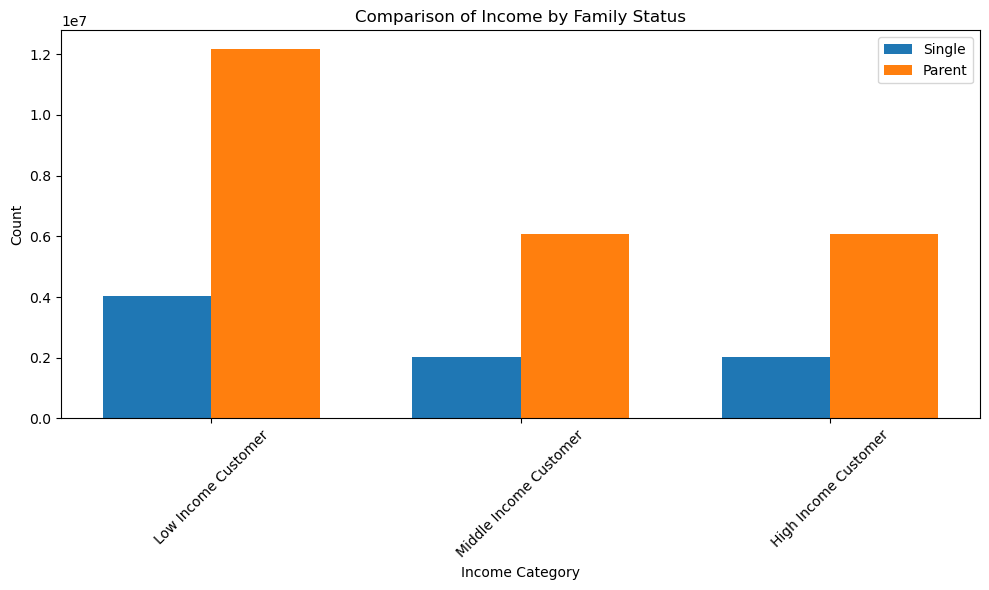

In [47]:
plt.figure
# Set bar width
bar_width = 0.35

# Number of categories (columns in your crosstab)
categories = crosstab_income_vs_dependents.columns
num_categories = len(categories)

# Positions for bars
r1 = np.arange(num_categories)
r2 = [x + bar_width for x in r1]

# Plot bars
plt.figure(figsize=(10,6))
plt.bar(r1, crosstab_income_vs_dependents.loc['Single'], width=bar_width, label='Single')
plt.bar(r2, crosstab_income_vs_dependents.loc['Parent'], width=bar_width, label='Parent')

# Labels and title
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.title('Comparison of Income by Family Status')
plt.xticks([r + bar_width/2 for r in r1], categories, rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

##### In this graph, patient profiles of Single, or Parent status were created between the various income brackets. This data suggests that a majority of orders were generated within the low income bracket, specifically who are parents.

##### While this income level is not necessarily "low-income" when compared to conventional standards, these customers are within the lower quartile of income data when using the describe() function.

#### 07. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure¶

In [50]:
#using a group by statement in order to aggregate data for the customer population (Parent, low-income

groupby_profile = ords_prods_merge_PII.groupby('Income_bracket').agg({'prices': ['max', 'min', 'mean']})
groupby_profile

/var/folders/pt/j8m6nsxn4_bc4m4ztc59tl380000gp/T/ipykernel_6138/986980899.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_profile = ords_prods_merge_PII.groupby('Income_bracket').agg({'prices': ['max', 'min', 'mean']})


prices                
                            max  min       mean
Income_bracket                                 
Low Income Customer     99999.0  1.0   8.023136
Middle Income Customer  99999.0  1.0   9.830749
High Income Customer    99999.0  1.0  22.037353

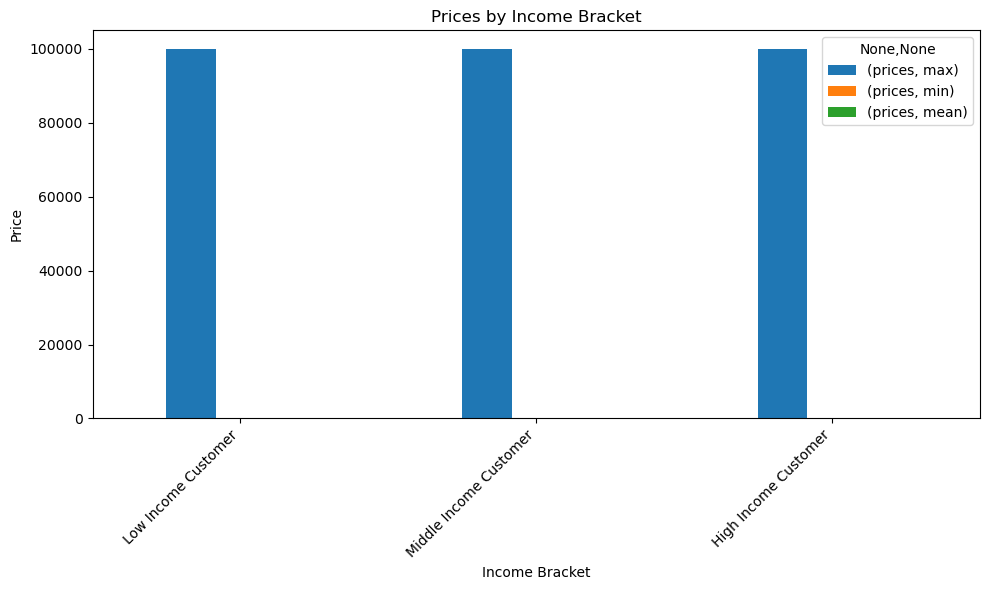

In [51]:
# Plot the bar graph
groupby_profile.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Prices by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Price')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the graph
plt.tight_layout()
plt.gcf().savefig(os.path.join(path, '04 Analysis', 'Visualizations', '8 4.10 bar_income_vs_spending_habits.png'))
plt.show()

#### 08. Region and Department based comparison between customer profiles

In [53]:
# New subset of df filtered based on instacart's most popular demographic (Lower income parents)
low_income_parents = ords_prods_merge_PII[(ords_prods_merge_PII['parent_status'] == 'Parent') & (ords_prods_merge_PII['Income_bracket'] == 'Low Income Customer')]
low_income_parents.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,Age,Date Joined,Number of Dependents,Family Status,Income,Region,activity_customer_level,age_group,Income_bracket,parent_status
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,81,8/1/2019,1,married,49620,Midwest,High-activity Customer,Senior,Low Income Customer,Parent
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,81,8/1/2019,1,married,49620,Midwest,High-activity Customer,Senior,Low Income Customer,Parent
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,40,2/9/2020,3,married,31308,Midwest,Low-activity Customer,Adult,Low Income Customer,Parent
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,40,2/9/2020,3,married,31308,Midwest,Low-activity Customer,Adult,Low Income Customer,Parent
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,51,1/4/2019,2,married,57797,West,High-activity Customer,Older adult,Low Income Customer,Parent


In [54]:
#Product data used to identify which were the top 10 products that were purchased within this demographic
product_counts = low_income_parents['product_name'].value_counts(dropna=False)

top_10_products_low_income_parents=product_counts.head(10)
top_10_products_low_income_parents

product_name
Banana                    170591
Bag of Organic Bananas    143559
Organic Strawberries       97857
Organic Baby Spinach       88445
Organic Hass Avocado       78648
Organic Avocado            64548
Strawberries               58342
Large Lemon                53046
Organic Raspberries        51163
Limes                      49319
Name: count, dtype: int64

##### Through these value counts we can see that it is heaviy within the produce department, which is consistent with earlier graphs identified

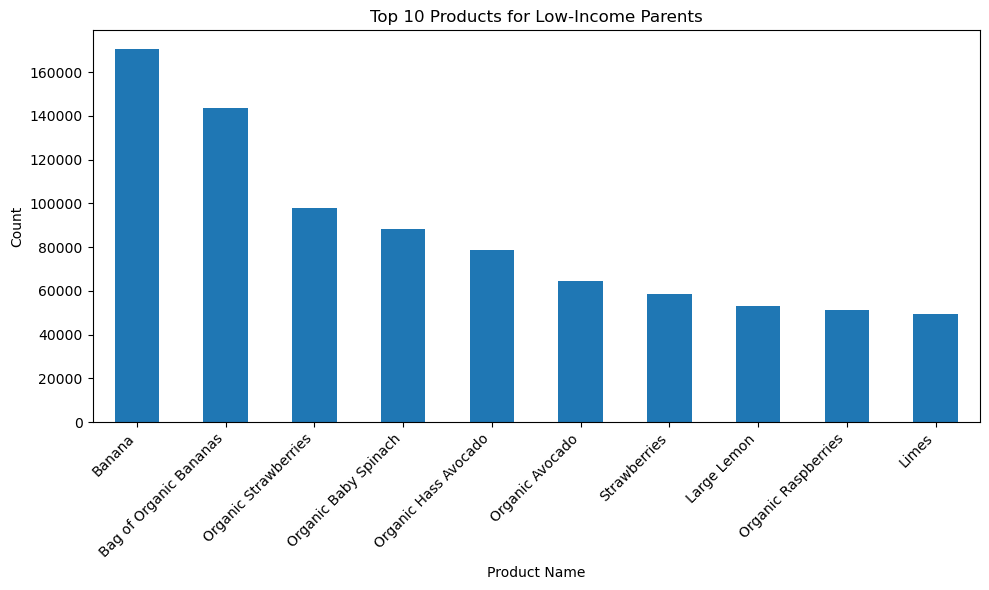

In [58]:
# Create a bar graph
plt.figure(figsize=(10, 6))
top_10_products_low_income_parents.plot(kind='bar')

# Add labels and title
plt.title('Top 10 Products for Low-Income Parents')
plt.xlabel('Product Name')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the graph
plt.tight_layout()
plt.gcf().savefig(os.path.join(path, '04 Analysis', 'Visualizations', '9 4.10 bar_top_10_products_low_income_parents.png'))
plt.show()

## Project key Questions

### Question 1

#### The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

In [63]:
# Adding new column for day of week for better readability

day_of_week = []
for value in ords_prods_merge_PII['orders_day_of_week']:
    if value == 0:
        day_of_week.append('Saturday')
    elif value == 1:
        day_of_week.append('Sunday')
    elif value == 2:
        day_of_week.append('Monday')
    elif value == 3:
        day_of_week.append('Tuesday')
    elif value == 4:
        day_of_week.append('Wednesday')
    elif value == 5:
        day_of_week.append('Thursday')
    elif value == 6:
        day_of_week.append('Friday')

ords_prods_merge_PII['day_of_week'] = day_of_week
ords_prods_merge_PII['day_of_week'].value_counts(dropna= False)


day_of_week
Saturday     6204182
Sunday       5660230
Friday       4496490
Monday       4213830
Thursday     4205791
Tuesday      3840534
Wednesday    3783802
Name: count, dtype: int64

In [65]:
crosstab_age_vs_dow = pd.crosstab(ords_prods_merge_PII['day_of_week'], ords_prods_merge_PII['age_group'], dropna = False)
crosstab_age_vs_dow

age_group,Adult,Older adult,Senior,Young adult
day_of_week,,,,
Friday,1122808,1123962,1199815,1049905
Monday,1055000,1058003,1114364,986463
Saturday,1558281,1537663,1643234,1465004
Sunday,1412179,1417239,1483125,1347687
Thursday,1053804,1050529,1113361,988097
Tuesday,962397,957689,1022963,897485
Wednesday,951787,942621,998222,891172


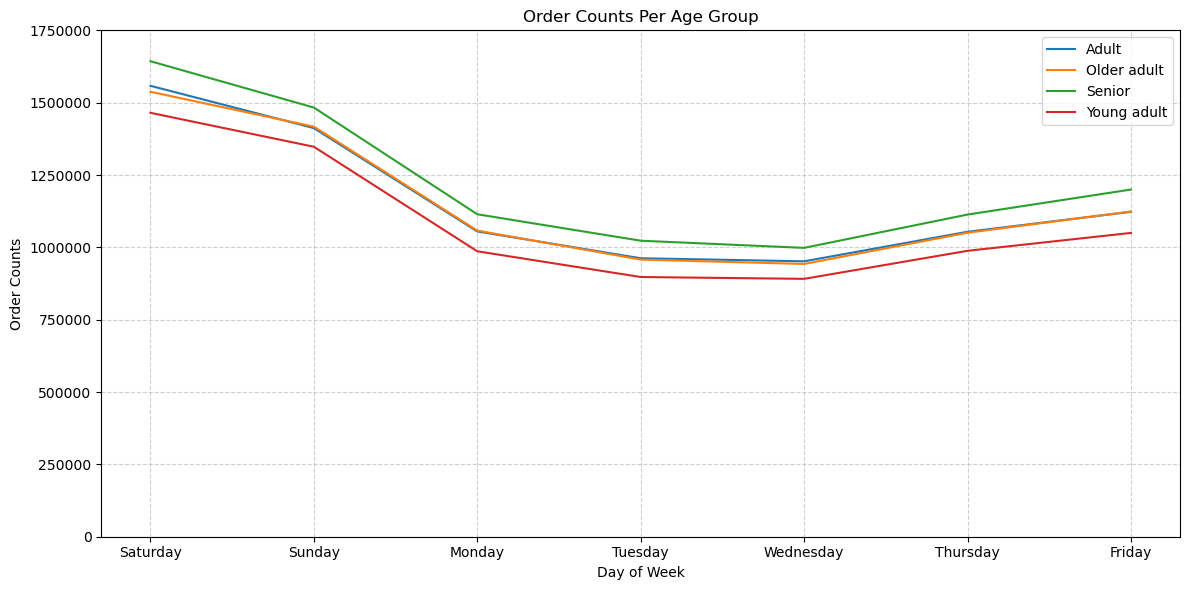

In [67]:
# Columns into Chronological Order
desired_order = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Reorder the DataFrame's index to the desired order
crosstab_age_vs_dow = crosstab_age_vs_dow.reindex(desired_order)

# Create the line chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

for age_group in crosstab_age_vs_dow.columns:
    plt.plot(crosstab_age_vs_dow.index, crosstab_age_vs_dow[age_group], label=age_group)

# Add title and labels
plt.title('Order Counts Per Age Group')
plt.xlabel('Day of Week')
plt.ylabel('Order Counts')

# Add legend
plt.legend()

# Display the plot
plt.yticks(np.arange(0,2000000,250000), 
           [int(value) if np.floor(value)==value else value for value in np.arange(0,2000000,250000)])
plt.xticks(range(0, 7))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.gcf().savefig(os.path.join(path, '04 Analysis', 'Visualizations', '2 4.10 line_age_group_vs_dow.png'))
plt.show() 

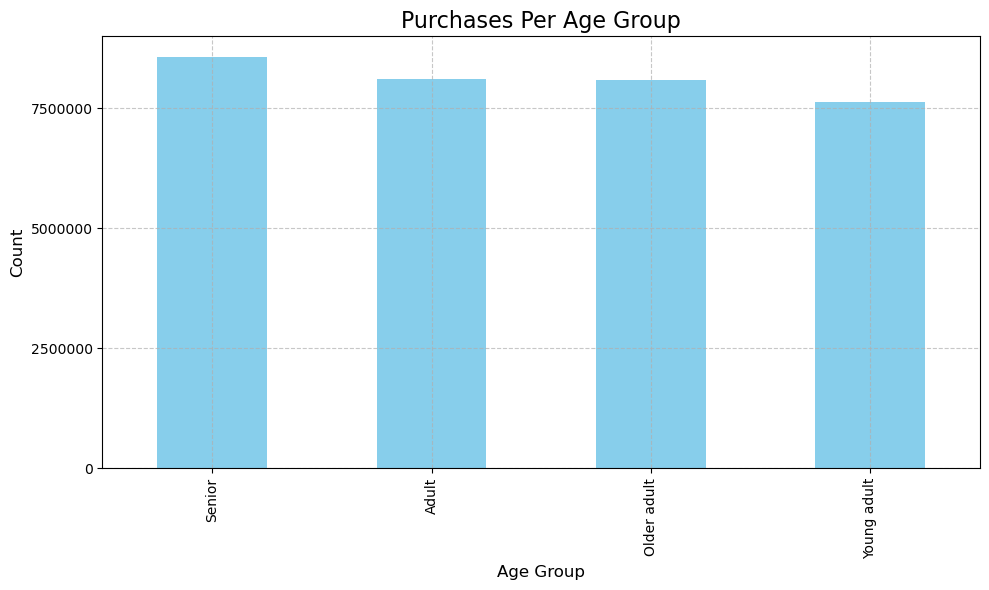

In [69]:
bar_age_group_counts= ords_prods_merge_PII['age_group'].value_counts().plot(kind='bar', color='skyblue', figsize=(10, 6))

# Customizations
plt.title('Purchases Per Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12) 
plt.yticks(np.arange(0,10000000,2500000), 
           [int(value) if np.floor(value)==value else value for value in np.arange(0,10000000,2500000)])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
bar_age_group_counts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '3 4.10 bar_age_group_counts.png'))

### Question 2

#### They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

In [77]:
crosstab_age_vs_time = pd.crosstab(ords_prods_merge_PII['order_hour_of_day'], ords_prods_merge_PII['age_group'], dropna = False)
crosstab_age_vs_time

age_group,Adult,Older adult,Senior,Young adult
order_hour_of_day,,,,
0,55522,53926,56612,52709
1,29263,28434,30136,27867
2,17682,16157,18310,17226
3,12790,12055,13967,12469
4,12590,13515,14327,12810
5,21110,21932,24049,20870
6,71761,70236,77589,70907
7,216690,225024,240259,209081
8,429116,430629,456844,401529


In [75]:
ords_prods_merge_PII.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'add_to_cart_order', 'reordered', '_merge', 'price_range_loc',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_spend', 'spender_flag', 'customer_frequency',
       'frequency_flag', 'Gender', 'State', 'Age', 'Date Joined',
       'Number of Dependents', 'Family Status', 'Income', 'Region',
       'activity_customer_level', 'age_group', 'Income_bracket',
       'parent_status', 'day_of_week'],
      dtype='object')

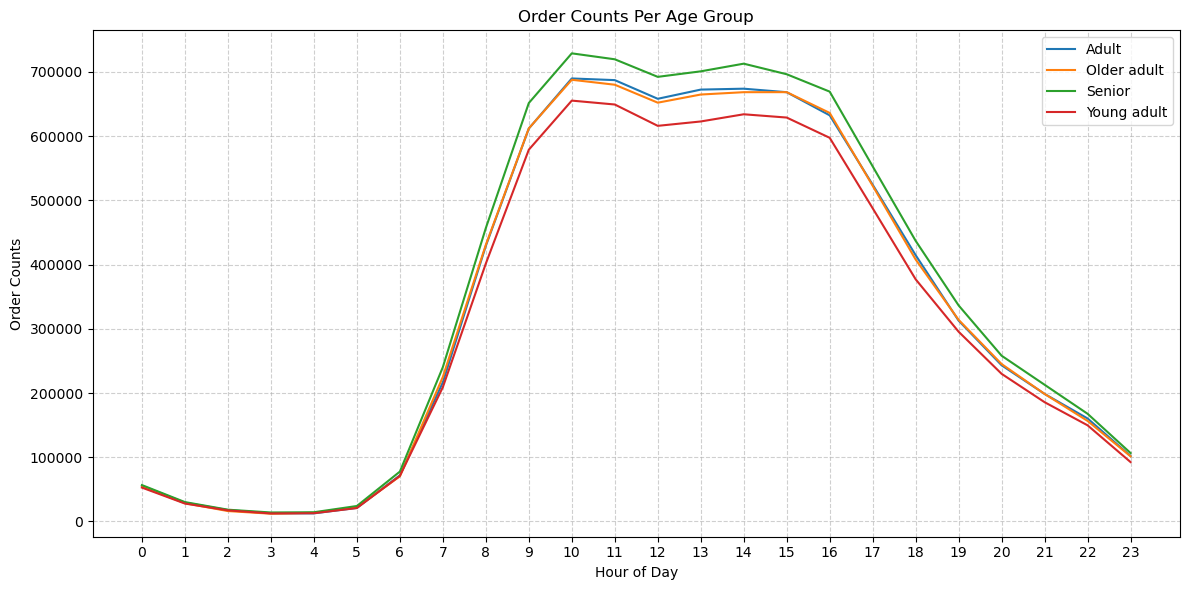

In [79]:
# Create the line chart
plt.figure(figsize=(12, 6)) 

for age_group in crosstab_age_vs_time.columns:
    plt.plot(crosstab_age_vs_time.index, crosstab_age_vs_time[age_group], label=age_group)

# Add title and labels
plt.title('Order Counts Per Age Group')
plt.xlabel('Hour of Day')
plt.ylabel('Order Counts')

# Add legend
plt.legend()

# Display the plot
plt.xticks(range(0, 24))  # Ensure all hours are displayed
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.gcf().savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4 4.10 line_age_group_vs_time.png'))
plt.show() 

##### Purchase data per hour was grouped per age group. Throughout all the purchase data, it seems like every age group follows the same trend of shopping per day.

##### We can see a peak around 10 am

##### All the group ages follow the same trends

## Question 3

#### Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

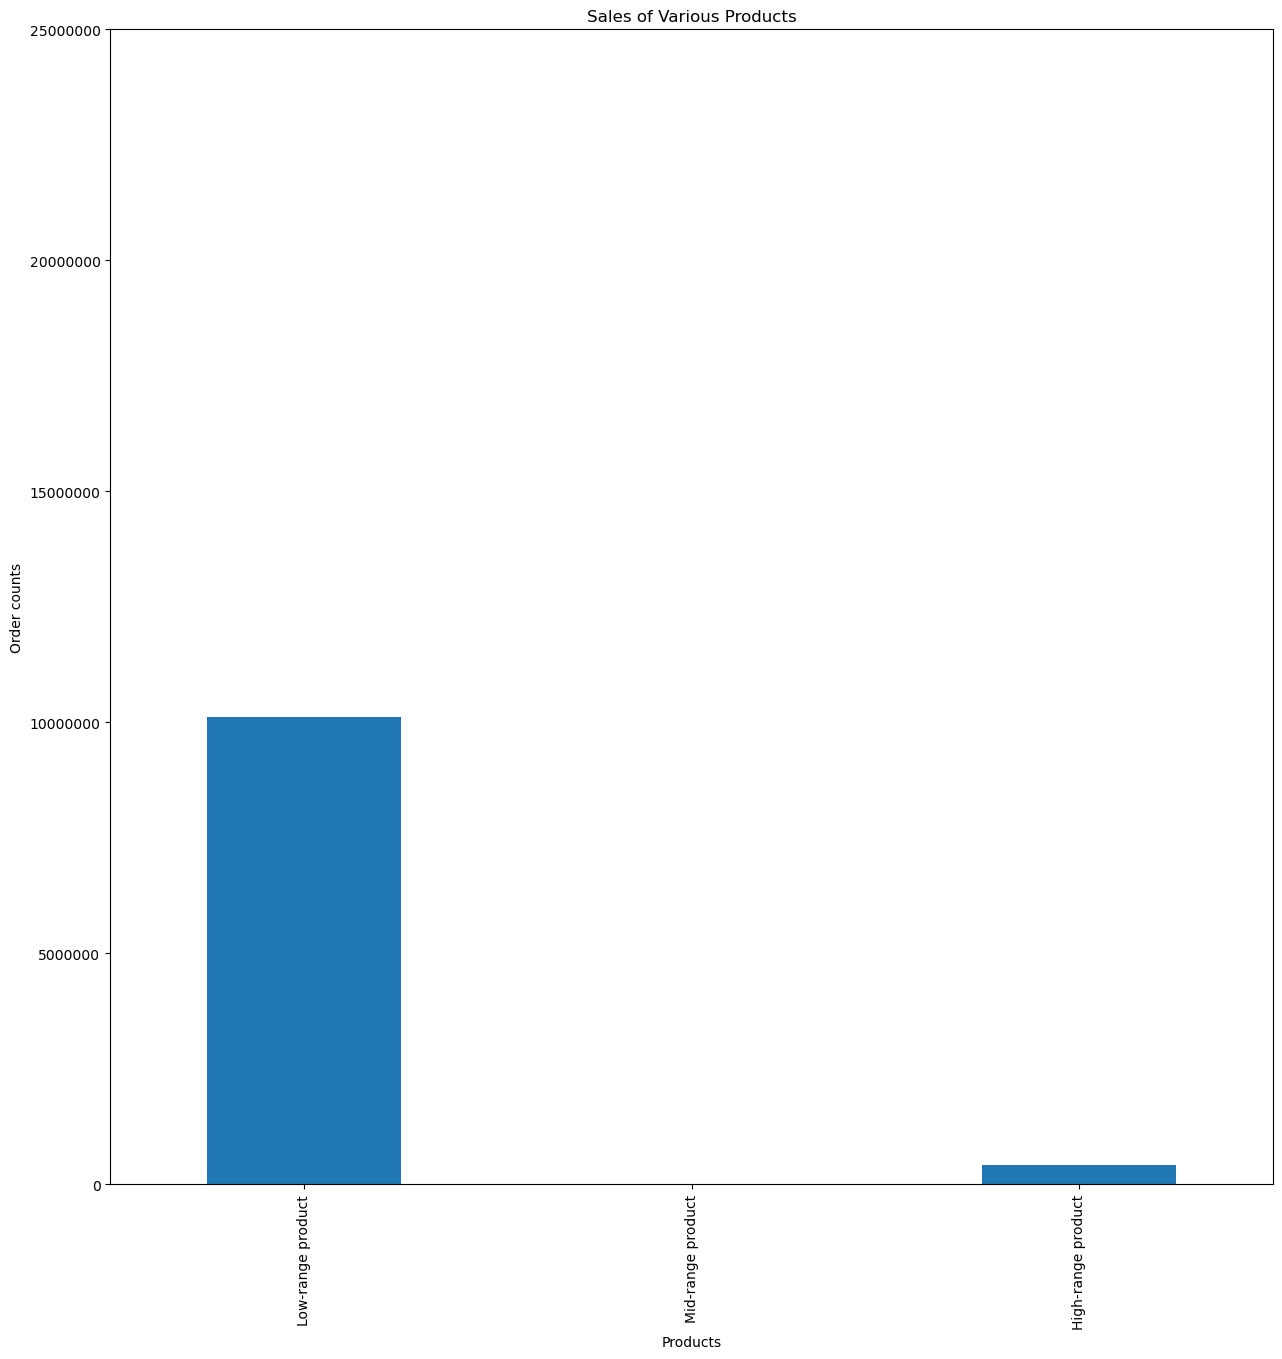

In [85]:
#From exercise 4.7, new variables of range groups of price tags were generated 

#High_range product: >$15
#Mid-Range Product: >$5 & <=$15
#Low-Range Product: <$5

# Reorder the categories
ordered_categories = ['Low-range product', 'Mid-range product', 'High-range product']

# Use Categorical data type to enforce the order
ords_prods_merge_PII['price_range_loc'] = pd.Categorical(ords_prods_merge_PII['price_range_loc'], categories=ordered_categories, ordered=True)

plt.figure(figsize=(15, 15))

# Plot the bar chart with the ordered categories
ords_prods_merge_PII['price_range_loc'].value_counts().sort_index().plot.bar()

# Add title and labels
plt.title('Sales of Various Products')
plt.xlabel('Products')
plt.ylabel('Order counts')

# Add legend
plt.yticks(np.arange(0,30000000,5000000), 
           [int(value) if np.floor(value)==value else value for value in np.arange(0,30000000,5000000)])

plt.gcf().savefig(os.path.join(path, '04 Analysis', 'Visualizations', '5 4.10 bar_sales_product_ranges.png'))
plt.show()

##### We can see the low-ranged products have the highest sales. Or in other words, products that are priced <5.

## Question 04

### Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

In [90]:
# Adding new column with names of the department for better readability

department_name = []

for value in ords_prods_merge_PII['department_id']:
    if value == 1:
        department_name.append('frozen')
    elif value == 2:
        department_name.append('other')
    elif value == 3:
        department_name.append('bakery')
    elif value == 4:
        department_name.append('produce')
    elif value == 5:
        department_name.append('alcohol')
    elif value == 6:
        department_name.append('international')
    elif value == 7:
        department_name.append('beverages')
    elif value == 8:
        department_name.append('pets')
    elif value == 9:
        department_name.append('dry goods pasta')
    elif value == 10:
        department_name.append('bulk')
    elif value == 11:
        department_name.append('personal care')
    elif value == 12:
        department_name.append('meat seafood')
    elif value == 13:
        department_name.append('pantry')
    elif value == 14:
        department_name.append('breakfast')
    elif value == 15:
        department_name.append('canned goods')
    elif value == 16:
        department_name.append('dairy eggs')
    elif value == 17:
        department_name.append('household')
    elif value == 18:
        department_name.append('babies')
    elif value == 19:
        department_name.append('snacks')
    elif value == 20:
        department_name.append('deli')
    elif value == 21:
        department_name.append('missing')
    else:
        department_name.append('Not enough information')


ords_prods_merge_PII['department_name'] = department_name

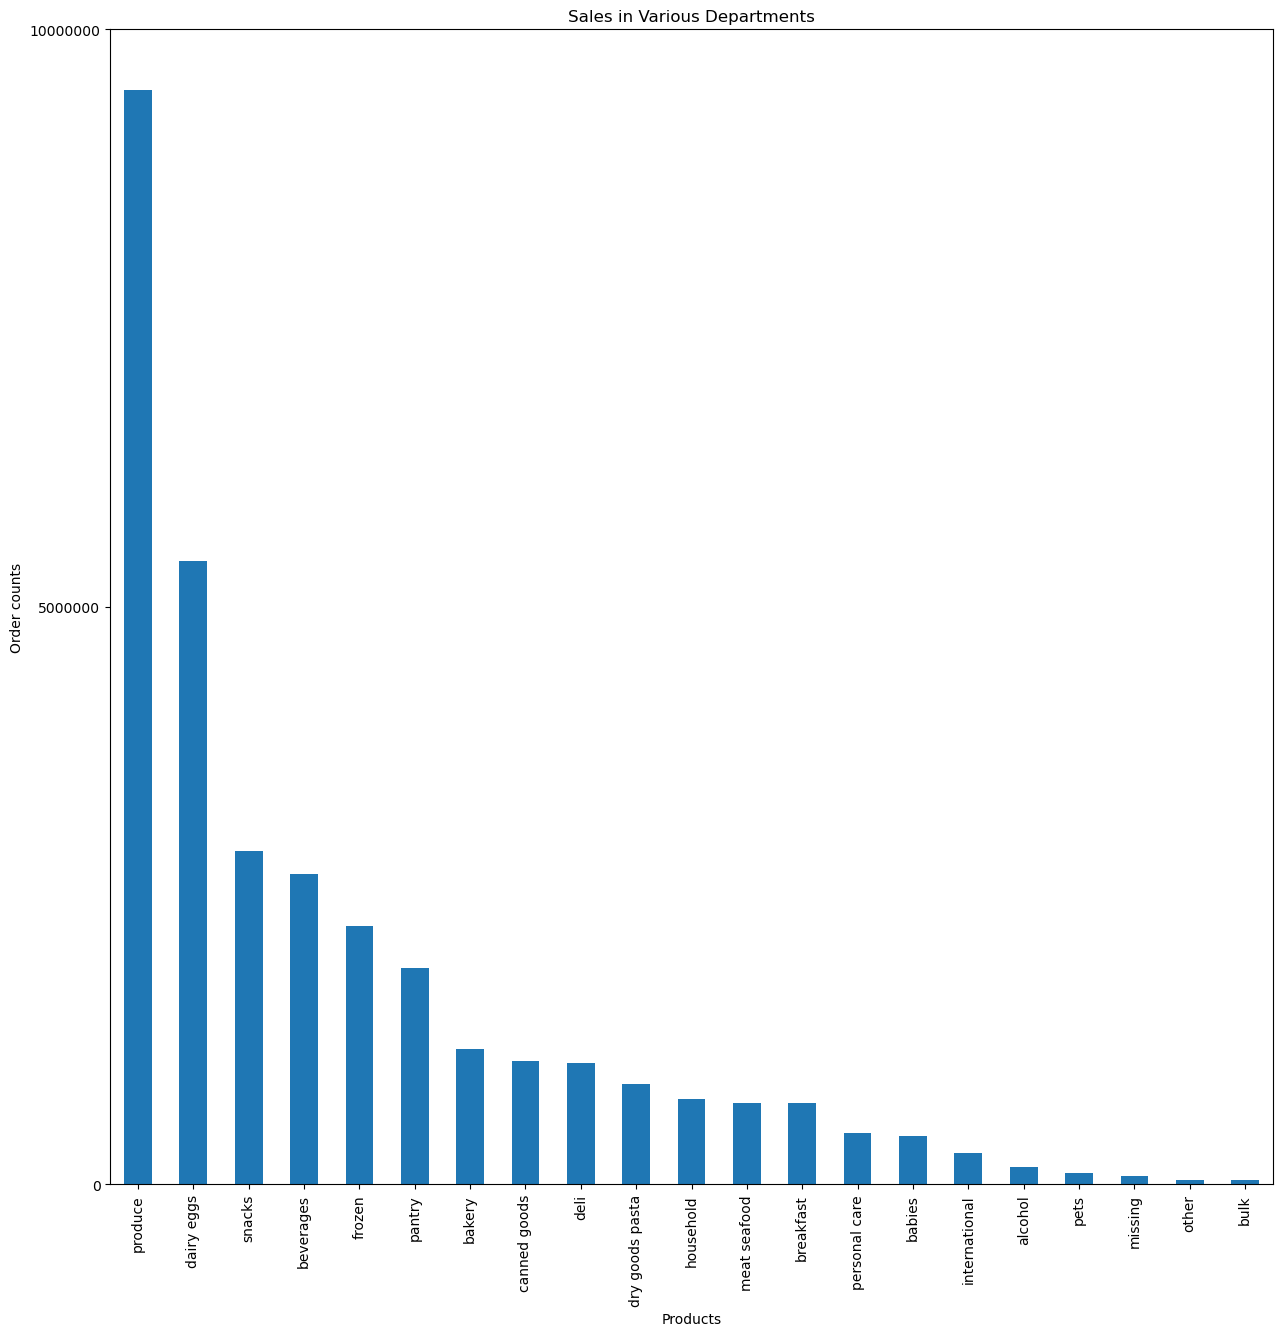

In [92]:
#Bar chart to show sales per department
plt.figure(figsize=(15, 15))

# Calculate the counts and sort by value (descending)
department_counts = ords_prods_merge_PII['department_name'].value_counts().sort_values(ascending=False)

# Plot the bar chart with the sorted counts
department_counts.plot.bar()

# Add title and labels
plt.title('Sales in Various Departments')
plt.xlabel('Products')
plt.ylabel('Order counts')

# Add legend
plt.yticks(np.arange(0,15000000,5000000), 
           [int(value) if np.floor(value)==value else value for value in np.arange(0,15000000,5000000)])

plt.gcf().savefig(os.path.join(path, '04 Analysis', 'Visualizations', '6 4.10 bar_sales_vs_departments.png'))
plt.show()

## 12. Expoting df

In [97]:
#Exporting final merged df
ords_prods_merge_PII.to_pickle(os.path.join(path, '02 Data','Prepared Data', '4.10 ords_prods_merge_PIIs.pkl'))

In [98]:
# The End